# Short reproduction of results
***

<div class="alert alert-block alert-warning">
This small tutorial will walk you through an example of the Holme-Newman model on small graphs. You can just have a look at the cells but if you want to benefit from the interactive features of the widget at the bottom, you will have to run it. You can either click on 'Cell' and then 'Run all' or you can run it cell by cell (a good way to follow it step by step). To do so just press 'shift'+'enter' on each cell.
</div>

This notebook has the follwing structure:
1. [Introduction](#section1)
2. [Small graph example](#section2)
3. [Bigger graph example](#section3)

Section 2 is an illustration of the model and meant to complement the short introduction. If you feel you understand the model and are pressed with time you can easily skip this section.

<a id='section1'></a>

## 1. Introduction
***
We start with a random graph which has the following parameters:

- $n$ : number of nodes
- $m$ : number of edges
- $\gamma$ : ratio of number of nodes over the number of opinions

The opinions are randomly assigned to the nodes which represent people. The edges between people represent their acquaintances. The simulation consist of discretized step. At each step, we either move an edge to lie between two individuals whose opinions agree (Step a, below), or we change the opinion of an individual to agree with one of their neighbors (Step b, below). 

![step](../media/Step-1-2.png)

More specificaly, we do the following:

<div class="alert alert-block alert-info">
<b>Algorithm:</b> Pick a node $i$ at random (which has opinion $g_i$). 

   - *If* : degree of the node $k_i=0$, do nothing. 
   - *Else* : 
        - with probability $\phi$: select an edge attached to $i$ randomly and move the other end of that edge to a node chosen randomly from the set of all nodes having opinion $g_i$.
        - with probability $1-\phi$: pick a random neighbor $j$ of $i$ and set $g_i$ equal to $g_j$.


</div>

The model finishes when all nodes have only neighbours of like-minded people. The networks segregates in communities with uniform opinion. This state is called the *consensus state*.

So let's start by importing the relevant modules. The object we are going to deal with is an `OpinionGraph` which is based on the `networkx` package.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import time
import sys
sys.path.append('../code')

import OpinionGraph
import OpinionAlgorithm

<a id='section2'></a>

## 2. Small graph example
***
We will first perform the model on a small graph ($n=30$, $m=60$ and $\gamma=10$), such that it can be represented. This allows to see what is happening at each step. Below, we create the random graph and plot it. Each color represents one opinion. We also show a summary of the graph properties.

Total number of components: 1
Components size: {size: number}={30: 1}
All components in consensus: False
Percentage of nodes in components in consensus state: 0.0


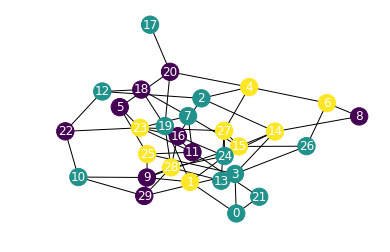

In [7]:
n = 30 # number of nodes
m = 60 #number of edges
gamma = 10 #ratio #nodes/#opinions
n_opinion = int(n/gamma) #number of opinions

#Generate random graph
G = OpinionGraph.CreateRandom(n, m, n_opinion, simple_graph=False)

#Plot the opinion graph
G.plot()

#Print summary of the graph
G.summary()

We perform ten steps for $\phi=0.65$, to illustrate the mechanism of the model

------------- Initial graph ------------


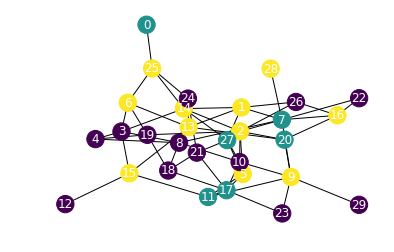

------------- Step 0 ------------
Selected node_i : 1
DOING STEP 1
Neighbors of node_i : [27, 14, 7, 13, 26]
Selected node_j : 14
Nodes with opinion g_i : [2, 5, 6, 9, 13, 14, 15, 16, 25, 28]
Selected node_j_prime : 13
Edge moved from (1,14) to (1,13)


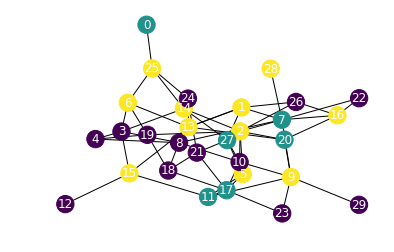

------------- Step 1 ------------
Selected node_i : 24
DOING STEP 1
Neighbors of node_i : [13, 21, 25]
Selected node_j : 21
Nodes with opinion g_i : [3, 4, 8, 10, 12, 18, 19, 21, 22, 23, 26, 29]
Selected node_j_prime : 3
Edge moved from (24,21) to (24,3)


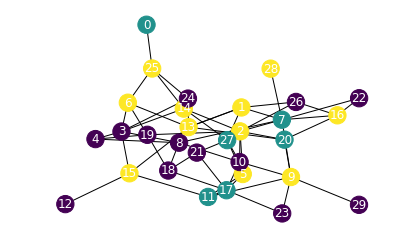

------------- Step 2 ------------
Selected node_i : 12
DOING STEP 1
Neighbors of node_i : [15]
Selected node_j : 15
Nodes with opinion g_i : [3, 4, 8, 10, 18, 19, 21, 22, 23, 24, 26, 29]
Selected node_j_prime : 4
Edge moved from (12,15) to (12,4)


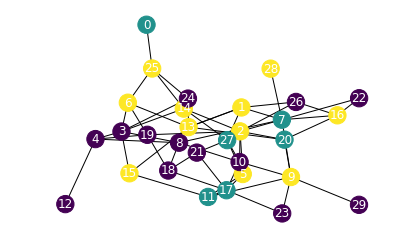

------------- Step 3 ------------
Selected node_i : 24
DOING STEP 1
Neighbors of node_i : [13, 25, 3]
Selected node_j : 13
Nodes with opinion g_i : [3, 4, 8, 10, 12, 18, 19, 21, 22, 23, 26, 29]
Selected node_j_prime : 10
Edge moved from (24,13) to (24,10)


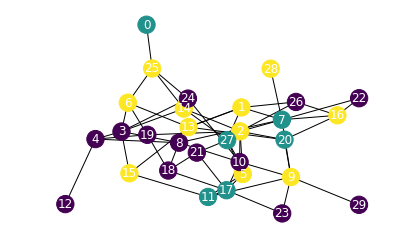

------------- Step 4 ------------
Selected node_i : 29
DOING STEP 1
Neighbors of node_i : [9]
Selected node_j : 9
Nodes with opinion g_i : [3, 4, 8, 10, 12, 18, 19, 21, 22, 23, 24, 26]
Selected node_j_prime : 3
Edge moved from (29,9) to (29,3)


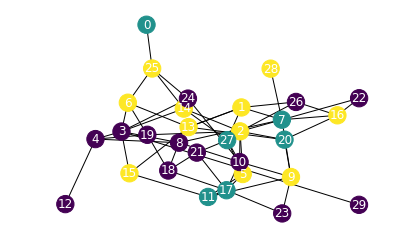

------------- Step 5 ------------
Selected node_i : 17
DOING STEP 2
Neighbors of node_i : [5, 10, 11, 18, 21, 23]
Selected node_j : 18
Opinion of node 17 changed from 1 to 0


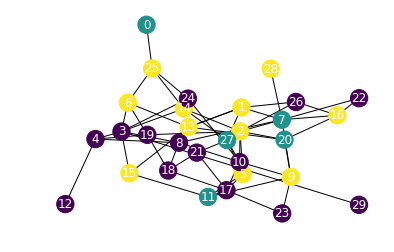

------------- Step 6 ------------
Selected node_i : 21
DOING STEP 1
Neighbors of node_i : [17, 18, 27]
Selected node_j : 17
Nodes with opinion g_i : [3, 4, 8, 10, 12, 18, 19, 22, 23, 24, 26, 29, 17]
Selected node_j_prime : 26
Edge moved from (21,17) to (21,26)


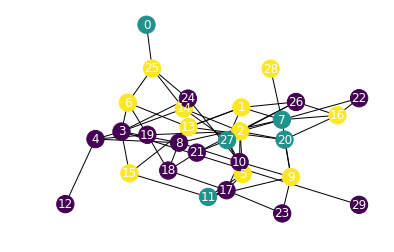

------------- Step 7 ------------
Selected node_i : 5
DOING STEP 1
Neighbors of node_i : [2, 11, 17, 27]
Selected node_j : 2
Nodes with opinion g_i : [1, 2, 6, 9, 13, 14, 15, 16, 25, 28]
Selected node_j_prime : 13
Edge moved from (5,2) to (5,13)


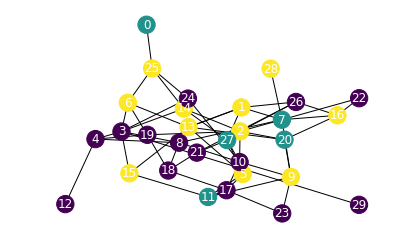

------------- Step 8 ------------
Selected node_i : 11
DOING STEP 1
Neighbors of node_i : [5, 9, 17, 15]
Selected node_j : 17
Nodes with opinion g_i : [0, 7, 20, 27]
Selected node_j_prime : 20
Edge moved from (11,17) to (11,20)


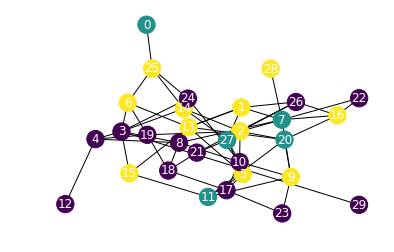

------------- Step 9 ------------
Selected node_i : 9
DOING STEP 2
Neighbors of node_i : [7, 10, 11, 23, 20]
Selected node_j : 20
Opinion of node 9 changed from 2 to 1


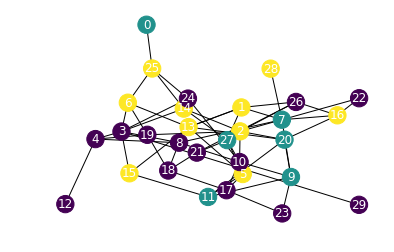

In [4]:
phi = 0.65
n_step = 10
OpinionAlgorithm.Simulation(G, phi, n_step, verbose=True)

We now perform the model until we reach consensus and plot the resulting graph.

Total number of components: 5
Components size: {size: number}={12: 1, 7: 1, 1: 2, 9: 1}
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


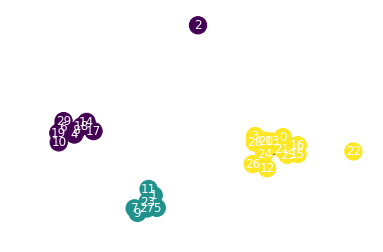

In [6]:
#Perform model until consensus is reached
OpinionAlgorithm.SimulationEndConsensus(G, phi)

#Plot the opinion graph
G.plot()

#Print summary of the graph
G.summary()

<a id='section3'></a>

## 3. Bigger graph example
***
We now move to a sligthly bigger graph (still small though). And run our model for twenty values of $\phi$ evenly spaced in [0, 1]. For each value of $\phi$, we run 5 realizations (i.e. we pick 5 different initial random graph). This is not enough to have a small variance but surely enough for your time. This step might be a bit long (2-4 min), so run the cell below and go grab a cup of coffee.

In [7]:
t0 = time.time() #set starting time

phi_step = 0.05
phis = np.arange(0,1 + phi_step, phi_step) #set the values of phi we want to test

n = 200 # number of nodes
m = 400 #number of edges
gamma = 10 #ratio #nodes/#opinions
n_opinion = int(n/gamma) #number of opinions
n_iter = 5 #number of iteration for each phi

results = []
biggest_community = []
for phi in phis:
    print(time.time()-t0, 'phi =', phi)
    comp_phi = []
    comp_big = []
    for i in range(n_iter):
        #Generate random graph
        G = OpinionGraph.CreateRandom(n, m, n_opinion, simple_graph=False)

        n_steps = OpinionAlgorithm.SimulationEndConsensus(G, phi, verbose=False, checkconsensus=1000)

        comp = G.CountComponents()
        comp = dict(comp)

        components_num = np.zeros(n+1)
        components_num[list(comp.keys())] = list(comp.values())
        comp_phi.append(components_num)
        comp_big.append(max(comp.keys()))
    results.append(comp_phi)
    biggest_community.append(comp_big)
    
results = np.array(results)
biggest_community = np.array(biggest_community)

0.0007021427154541016 phi = 0.0
2.362548828125 phi = 0.05
10.28671407699585 phi = 0.1
25.377596139907837 phi = 0.15000000000000002
48.98231625556946 phi = 0.2
67.16186356544495 phi = 0.25
105.33373355865479 phi = 0.30000000000000004
129.13230681419373 phi = 0.35000000000000003
146.0102617740631 phi = 0.4
155.2599494457245 phi = 0.45
162.41274762153625 phi = 0.5
166.42105960845947 phi = 0.55
168.60577583312988 phi = 0.6000000000000001
170.4466724395752 phi = 0.65
172.49369883537292 phi = 0.7000000000000001
174.0326690673828 phi = 0.75
175.45368647575378 phi = 0.8
176.6672236919403 phi = 0.8500000000000001
177.7714385986328 phi = 0.9
178.75919270515442 phi = 0.9500000000000001
179.65563035011292 phi = 1.0


As you have probbaly seen, even for a small graph ($n=200$, $m=400$) and only 5 iterations, this takes a lot of time. So imagine for a big graph ($n=3200$, $m=6400$) with thousand of iterations, it's such a pain! Maybe we are just so bad at optimizing. Anyway, this is what the code can do; for us this gonna be as fast as it gets.

Let's now have a look at the data we have generated. For each realization we recorded the distribution of community sizes $s$ in the consensus state. The order paramter for this model is the size of the biggest community in the consensus state as a fraction of the system size, i.e. $S = \max_s s\cdot N^{-1}$. Below we plot the mean value of $S$ 
across the 5 iterations.

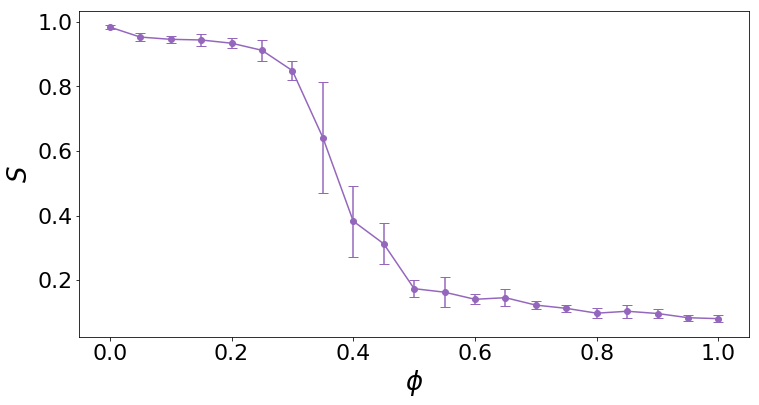

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(phis, biggest_community.mean(axis=1)*n**(-1), color = 'C4')
ax.errorbar(phis, biggest_community.mean(axis=1)*n**(-1), yerr=biggest_community.std(axis=1)*n**(-1), 
            fmt='o', capsize=5, color = 'C4')


ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$S$', fontsize=26)
ax.tick_params(labelsize=22)

As you can see there is a qualitative change between a regime where there is one giant community (for $\phi\rightarrow 0$) and a regime where there is a distribution of smaller communities (for $\phi\rightarrow 1$). There is a continuous phase transition between those two regimes. The critical value of $\phi$ lies around 0.4. Measuring exactly this paramter requires more iterations and different sizes of graphs.

We now plot the distribution of sizes (just a normalized histogram) as a function of $\phi$. You can use the slider to change the value of $\phi$.

In [10]:
def plot_dist(i, df, phis):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    size = np.arange(df.shape[2])
    df_proba = df[i].sum(axis=0)/df[i].sum()

    ax.scatter(size[1:], df_proba[1:], color='C4')

    ax.set_title('$\phi = {0}$'.format(phis[i]), fontsize=20)
    ax.set_xlabel('$s$', fontsize=26)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((1e-5,1))
    ax.set_ylabel('$P(s)$', fontsize=26)
    ax.tick_params(labelsize=22)
    
interact(plot_dist, i=(0,len(phis)-1,1), df=fixed(results), phis=fixed(phis), rescale=True);

interactive(children=(IntSlider(value=10, description='i', max=20), Output()), _dom_classes=('widget-interact'…

As you can see for small values of $\phi$ there is a big community and a distribution of small communities. Close to the critical $\phi$, i.e. around $\phi\sim0.45$, there is a power-law distribution (you can almost see the line, look closely). For large values of $\phi$, there is a distribution of communities peaked around 10. This the ratio $\gamma$ of number of nodes over number of opinions.

As a reward for reaching this point, we will now show you what it looks like with more iterations and bigger graphs. Below you have the result on $n=800$, $m=1600$ graphs with $10^3$ iterations:

![fig2](../media/Fig2_n800_m1600.png)